## Runge-Kutta 4

Para ecuaciones de movimiento en 3 dimensiones

In [2]:
import numpy as np
import math as m
import pandas as pd

In [3]:
# Condiciones iniciales

h = 0.1
t = np.arange(0,3, h)
n_fil = t.size
n_col = 6
xyz = np.zeros([n_fil,n_col])
Mx = 100
My = 0
Mz = 0
I0 = 10000
I2 = 10000
theta = 1.8
sth = m.sin(theta)
cth = m.cos(theta)

xyz[0,0] = m.pi / 3 # x0
xyz[0,1] = m.pi / 6 # y0
xyz[0,2] = m.pi / 6 # z0 
xyz[0,3] = 2 # xdot0
xyz[0,4] = 2 # ydot0
xyz[0,5] = 2 # zdot0

def betax(t, x, xdot, y, ydot, z, zdot):
  return xdot

def betax_dot(t, x, xdot, y, ydot, z, zdot ):
  return (Mx + I0 * (y **2 ) * sth - I2 * y * sth * (y * cth + z ) ) / I0

def fiy(t, x, xdot, y, ydot, z, zdot):
  return ydot

def fiy_dot(t, x, xdot, y, ydot, z, zdot):
  return (My + I2 * x * (y * cth + z) - 2 * y * x * cth ) / (I0 * sth)

def psiz(t, x, xdot, y, ydot, z, zdot):
  return zdot

def psiz_dot(t, x, xdot, y, ydot, z, zdot):
  return (Mz - I2 * ydot * cth + y * x * sth) / I2

functions = [betax, fiy, psiz, betax_dot, fiy_dot, psiz_dot]

In [4]:
def rungeKutta4(h, n_filas, n_columnas, x_arr, t_arr, functions):

  h2 = h/2

  for fila in range(1,n_filas):

    for columna in range(n_columnas):
      k_1 = h*(functions[columna](t_arr[fila-1], x_arr[fila-1,0], x_arr[fila-1,1], x_arr[fila-1,2], x_arr[fila-1,3], x_arr[fila-1,4], x_arr[fila-1,5]))

      k_2 = h*(functions[columna](t_arr[fila-1] + h2 , x_arr[fila-1,0] + k_1 * h2, x_arr[fila-1,1] + k_1 * h2, x_arr[fila-1,2] + k_1 * h2, x_arr[fila-1,3] + k_1 * h2, x_arr[fila-1,4] + k_1 * h2, x_arr[fila-1,5] + k_1 * h2))

      k_3 = h*(functions[columna](t_arr[fila-1] + h2 , x_arr[fila-1,0] + k_2 * h2, x_arr[fila-1,1] + k_2 * h2, x_arr[fila-1,2] + k_2 * h2, x_arr[fila-1,3] + k_2 * h2, x_arr[fila-1,4] + k_2 * h2, x_arr[fila-1,5] + k_2 * h2))

      k_4 = h*(functions[columna](t_arr[fila-1] + h, x_arr[fila-1,0] + k_3 * h, x_arr[fila-1,1] + k_3 * h, x_arr[fila-1,2] + k_3 * h, x_arr[fila-1,3] + k_3 * h, x_arr[fila-1,4] + k_3 * h, x_arr[fila-1,5] + k_3 * h))

      x_arr[fila,columna] = x_arr[fila-1, columna] + (h * (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6)

  return x_arr


In [5]:
r_arr = rungeKutta4(h, n_fil, n_col, xyz, t, functions)

In [ ]:
r_arr 

In [ ]:
df = pd.DataFrame(data=xyz, columns=["x", "y", "z", "xdot", "ydot", "zdot"])

In [8]:
def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])
  
def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])
  
def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])

In [ ]:
R = Rz(r_arr[0,0]) * Ry(r_arr[0,1]) * Rz(r_arr[0,2])

eul1 = m.atan2(r_arr.item(0,1),r_arr.item(0,2))
sp = m.sin(eul1)
cp = m.cos(eul1)
eul2 = m.atan2(cp*R.item(0,2)+sp*R.item(1,2), R.item(2,2))
eul3 = m.atan2(-sp*R.item(0,0)+cp*R.item(1,0),-sp*R.item(0,1)+cp*R.item(1,1))
 
print("phi =", eul1)
print("theta =", eul2)
print("psi =", eul3)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["figure.dpi"] = 150 

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

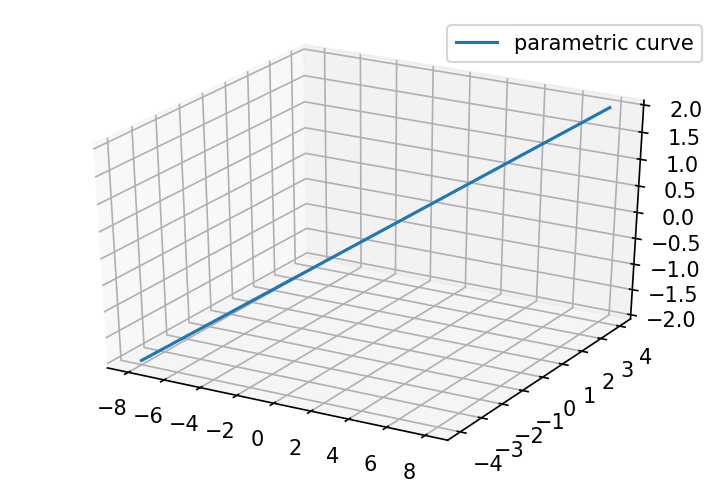

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z
x = 4 * np.linspace(-2, 2, 100)
y = 2 * z
ax.plot(x, y, z, label='parametric curve')
ax.legend()

In [ ]:
plt.plot(df, label="column")
plt.show()

plt.legend(loc=2, ncol=2)



Text(0, 0.5, 'Score')

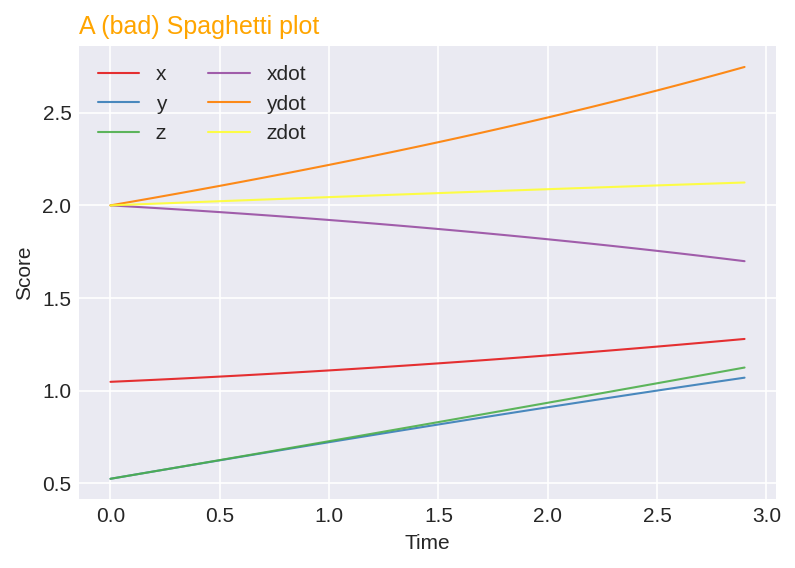

In [ ]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df:
  plt.plot(t, df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
  num+=1
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")


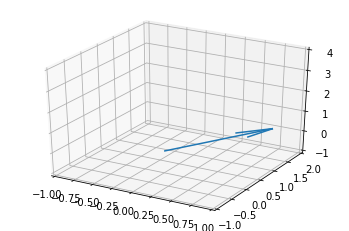

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np





soa = np.array([[0, 0, 0, 1, 1, 1]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 2])
ax.set_zlim([-1, 4])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


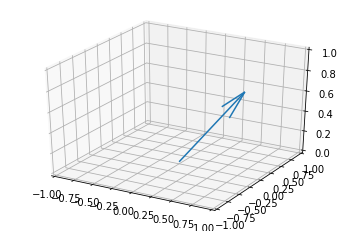

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


phi = r_arr[20,0]
theta = r_arr[20,1]
psi = r_arr[20,1]
# print("phi =", phi)
# print("theta  =", theta)
# print("psi =", psi)
  
  
R = Rz(psi) * Ry(theta) * Rz(phi)

unitario = np.array([[0], [0], [1] ])

r_uni = R * unitario

soa = np.array([[0, 0, 0, r_uni[0],r_uni[1], r_uni[2] ]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])
plt.show()